In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)
y=housing.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
y_pred

array([0.565  , 0.521  , 5.00001, ..., 1.222  , 1.405  , 5.00001])

In [11]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.5980792229844469

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameter = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Initialize the GridSearchCV with the correct scoring parameter
regressorcv = GridSearchCV(regressor, param_grid=parameter, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
regressorcv.fit(X_train, y_train)


C:\Users\Kushagra\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
440 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kushagra\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kushagra\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Kushagra\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_pa

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [13]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [14]:
y_pred=regressorcv.predict(X_test)
r2_score(y_pred,y_test)

0.5824127923710143

pip install pandas-profiling

In [6]:
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
pip install setuptools

Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-72.2.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-72.2.0-py3-none-any.whl (2.3 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import seaborn as sns
from ydata_profiling import ProfileReport

df = sns.load_dataset('tips')
profile = ProfileReport(df, explorative=True)
profile.to_file('output.html')

C:\Users\Kushagra\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 200.13it/s]


In [5]:
#autoviz library
!pip install autoviz

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/67.5 kB ? eta -:--:--
   ---------------------------------------- 67.5/67.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/177.6 kB ? eta -:--:--
   --------------------------------------- 177.6/177.6 kB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/5.0 MB 10.9 MB/s eta 0:00:01
   ------------- -------------------------- 1.7/5.0 MB 18.2 MB/s eta 0:00:01
   ----------------------- ---------------- 3.0/5.0 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------  5.0/5.0 M

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.to_csv('tips.csv')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (244, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of D

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,243.000000,Possible ID column: drop before modeling step.
total_bill,float64,0.000000,NA,3.070000,50.810000,Column has 9 outliers greater than upper bound (40.30) or lower than lower bound(-2.82). Cap them or remove them.
tip,float64,0.000000,NA,1.000000,10.000000,Column has 9 outliers greater than upper bound (5.91) or lower than lower bound(-0.34). Cap them or remove them.
sex,object,0.000000,0,,,No issue
smoker,object,0.000000,0,,,No issue
day,object,0.000000,1,,,No issue
time,object,0.000000,0,,,No issue
size,int64,0.000000,2,1.000000,6.000000,Column has 9 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them.


Number of All Scatter Plots = 3


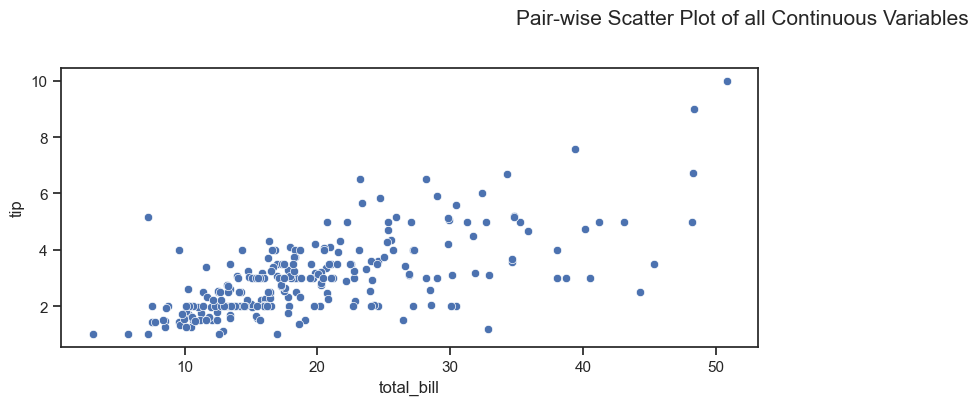

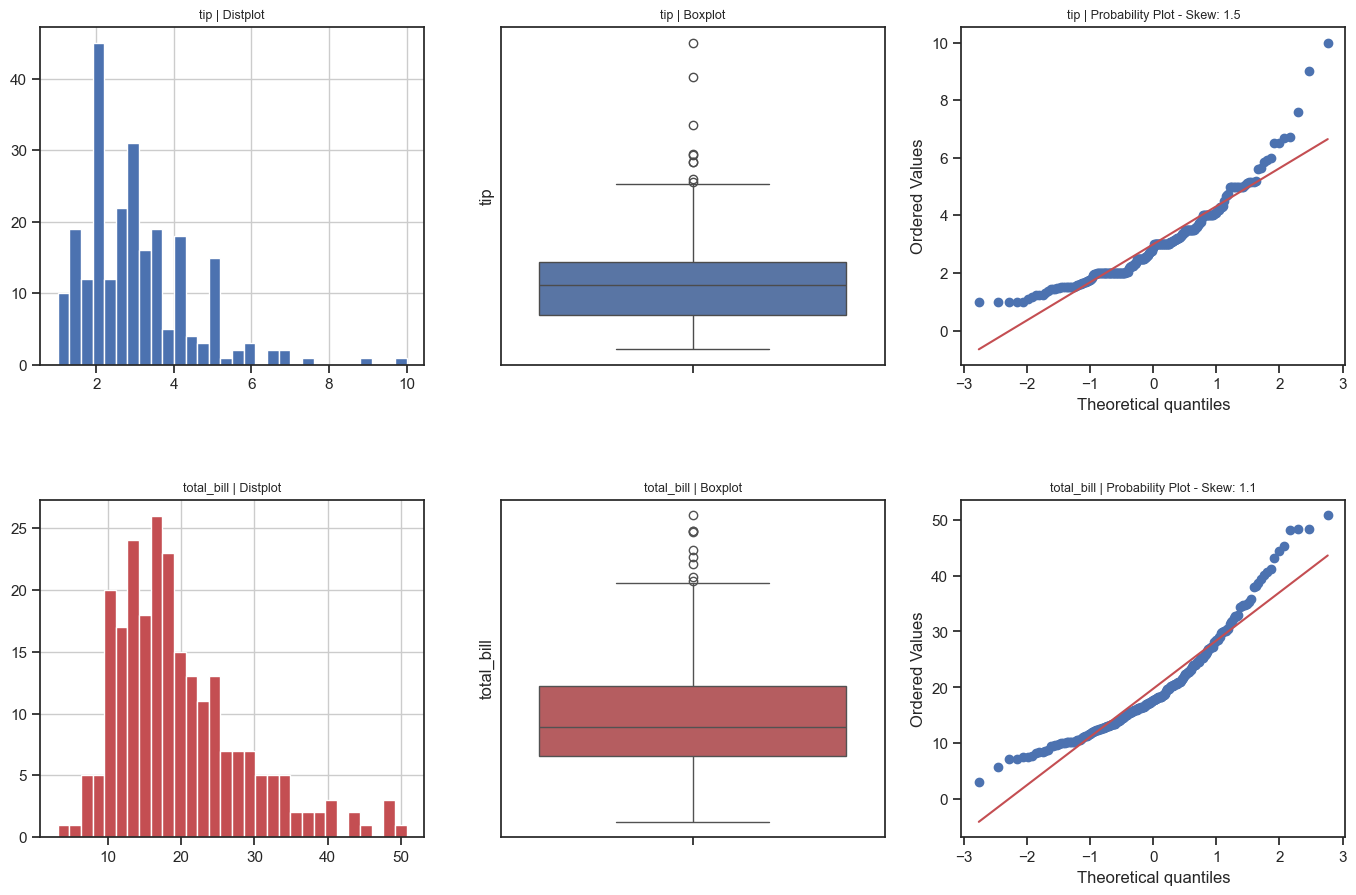

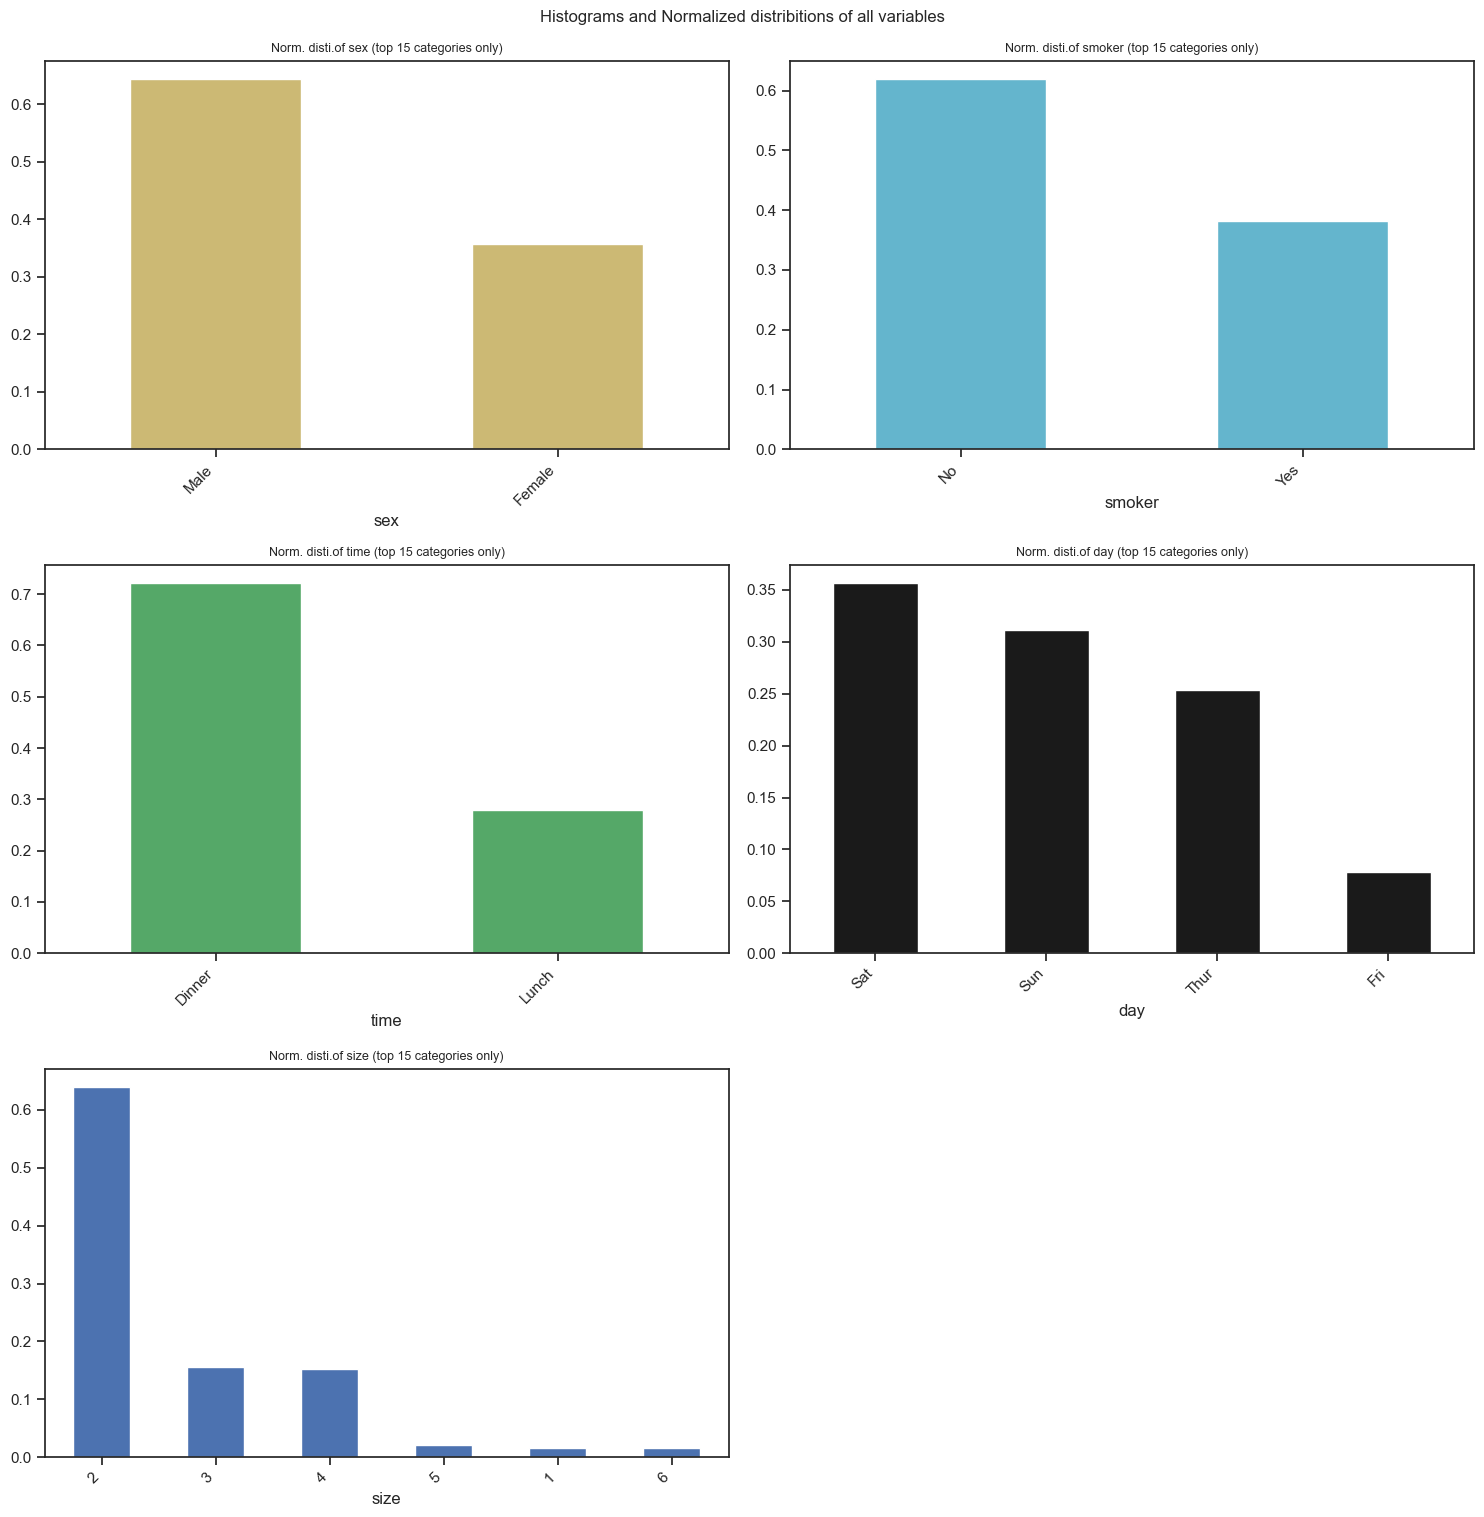

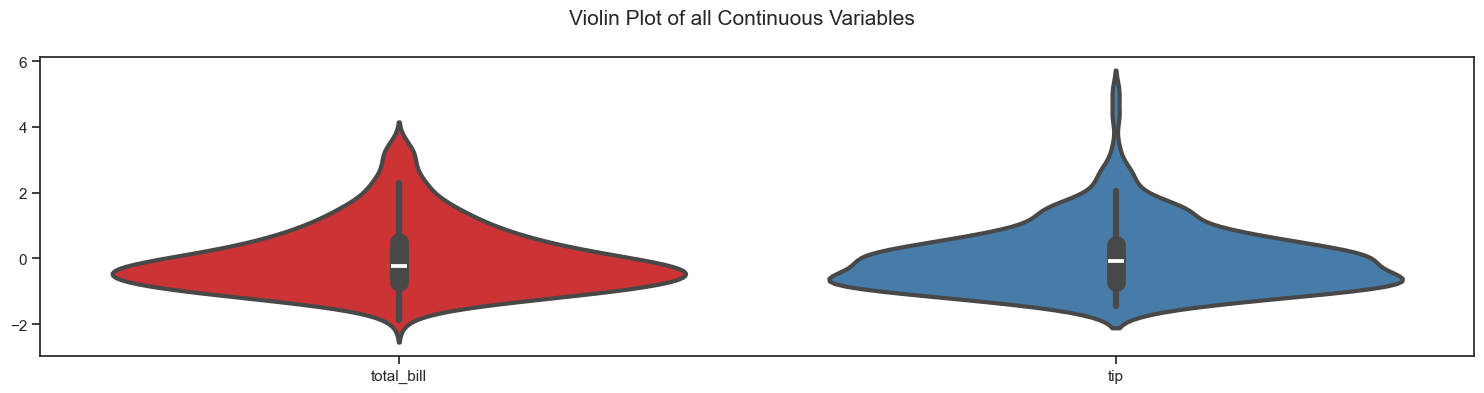

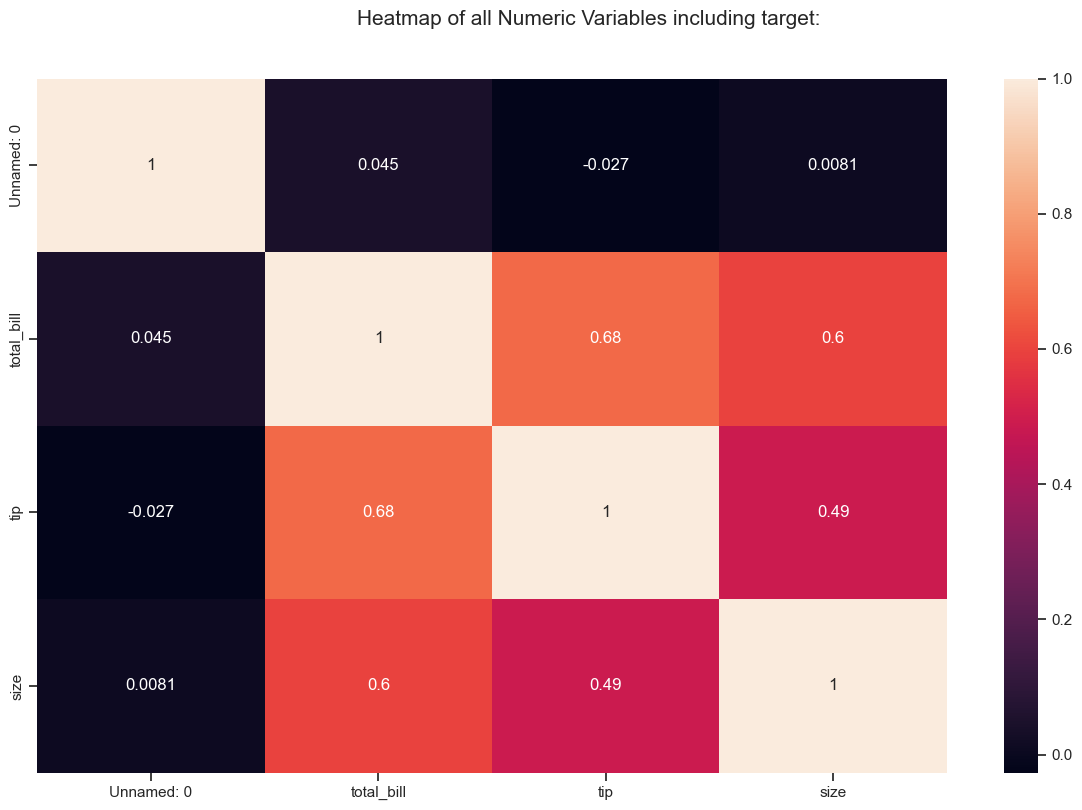

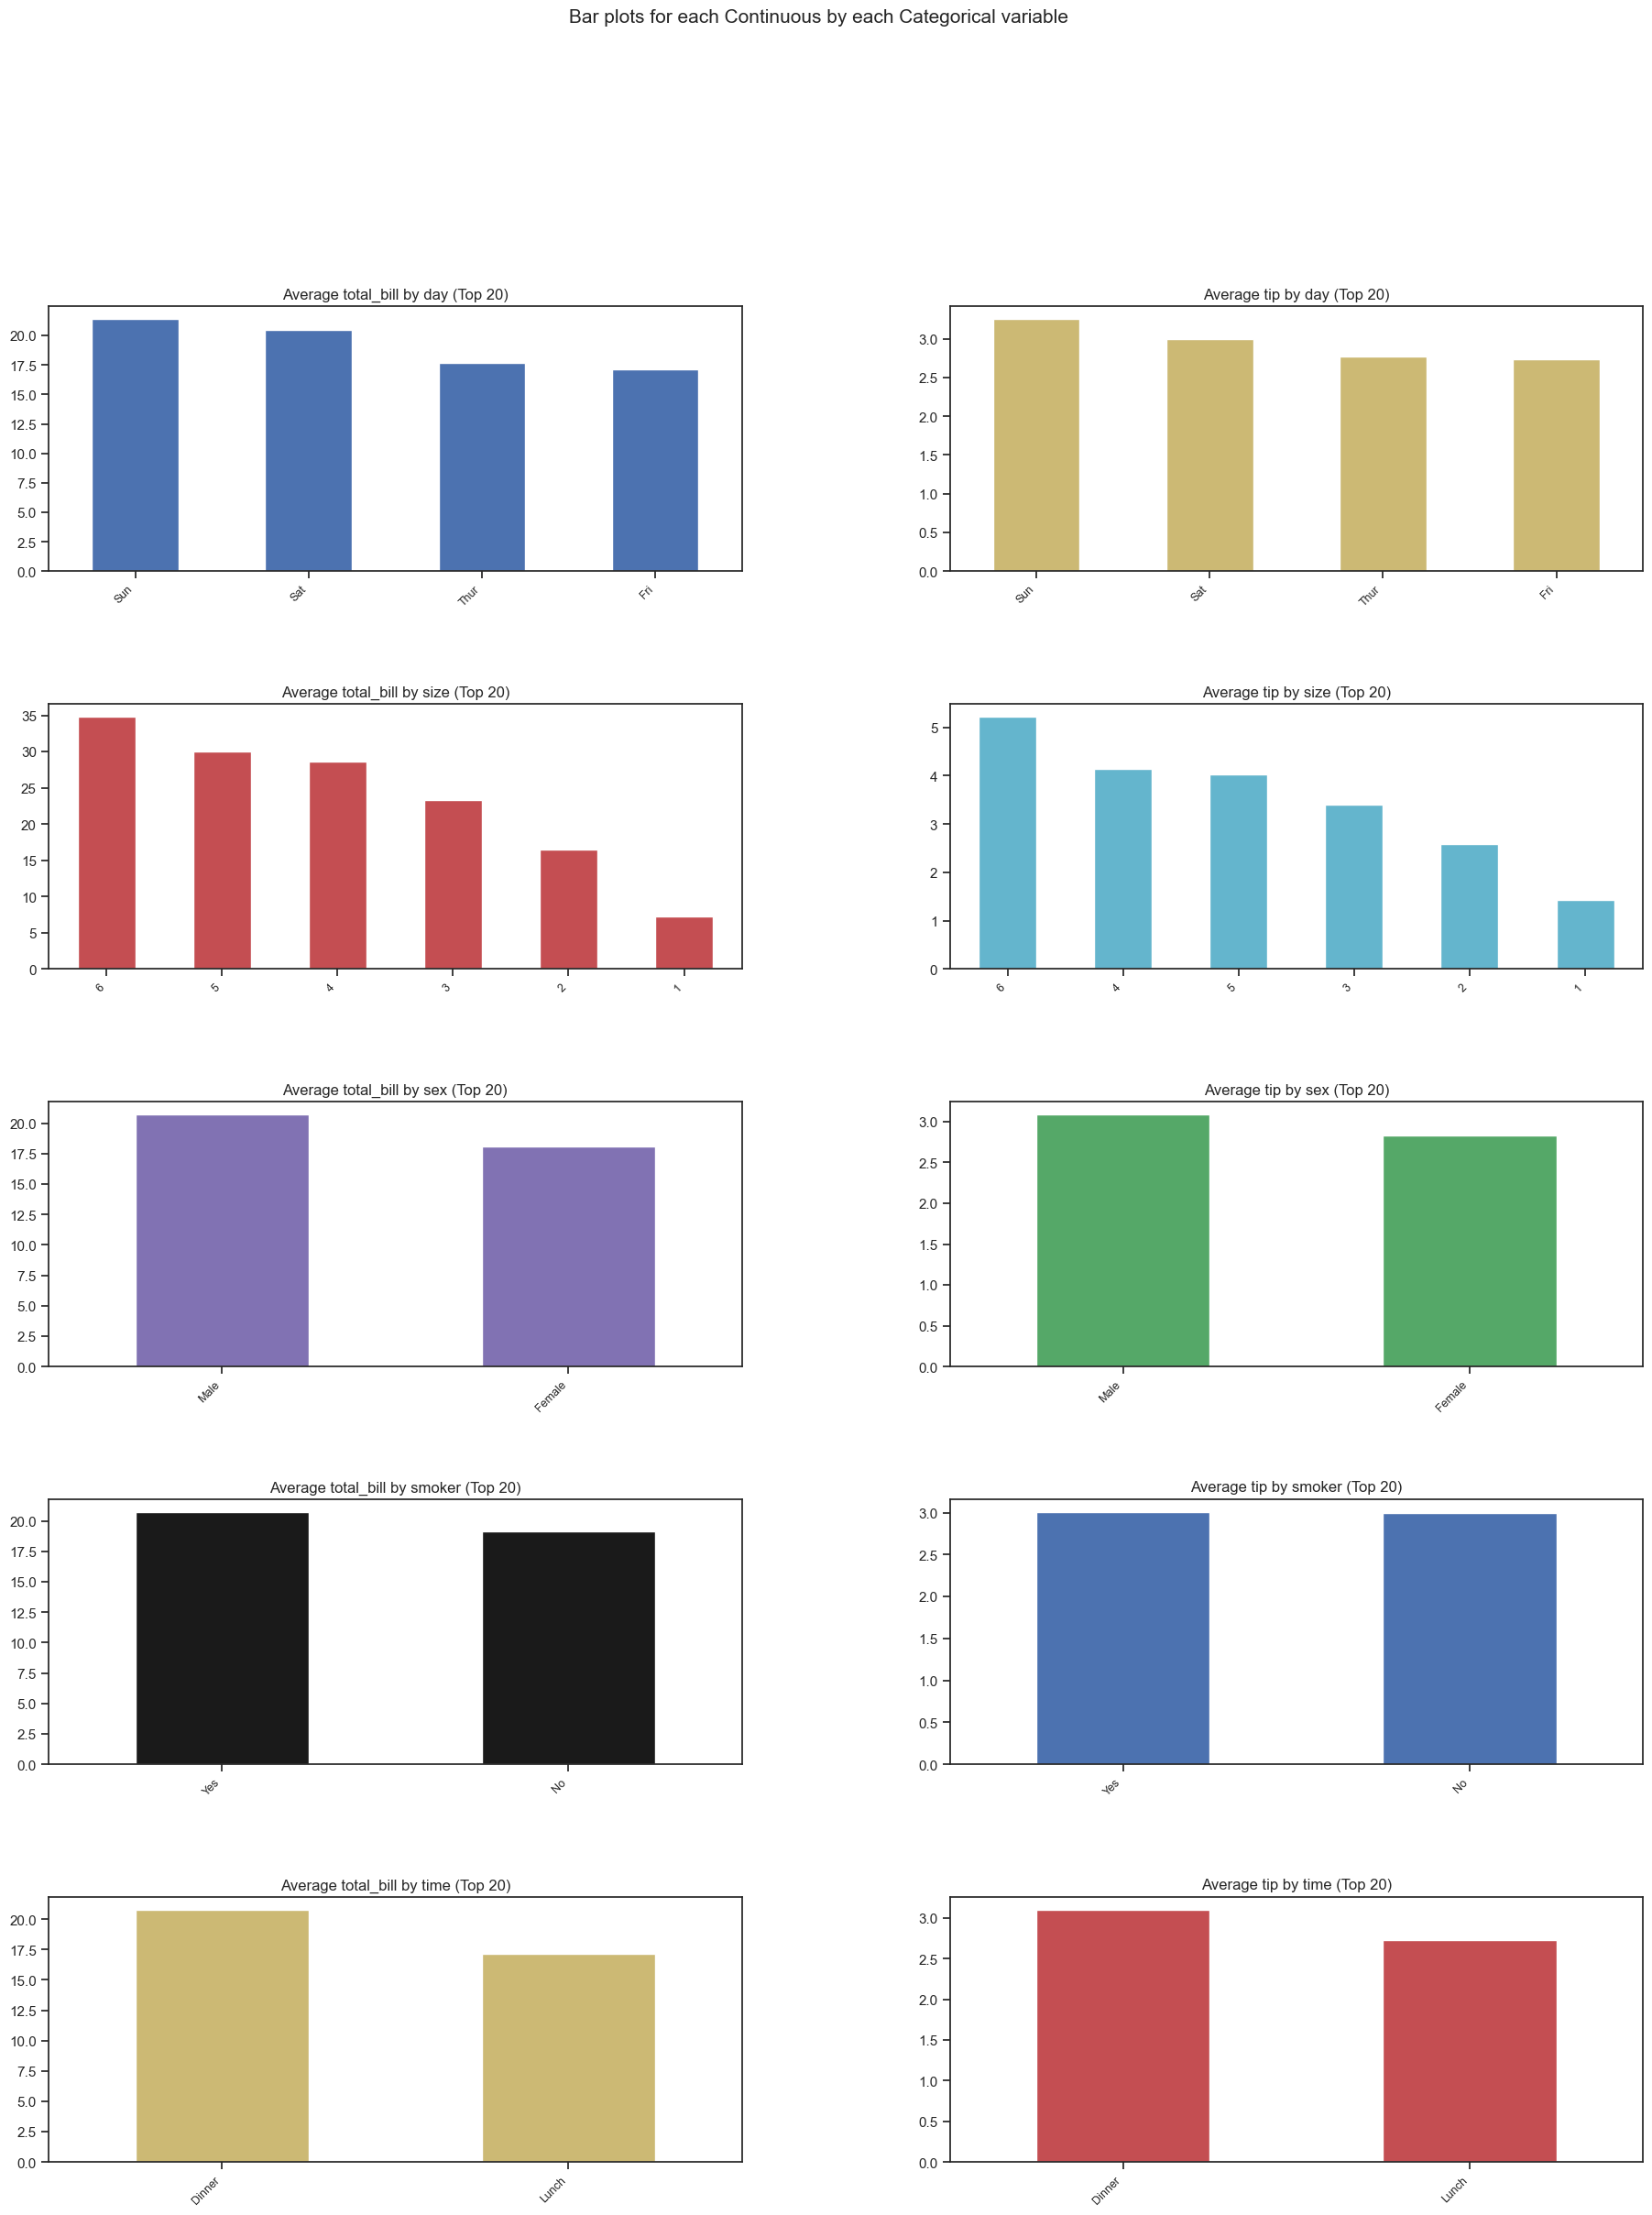

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [1]:
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()
import matplotlib.pyplot as plt
%matplotlib inline
filename="tips.csv"
dft=AV.AutoViz(filename)

In [2]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 1.3 MB/s eta 0:00:12
    --------------------------------------- 0.2/15.1 MB 3.4 MB/s eta 0:00:05
   - -------------------------------------- 0.7/15.1 MB 6.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/15.1 MB 9.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.9/15.1 MB 9.5 MB/s eta 0:00:02
   ---------- ----------------------------- 3.8/15.1 MB 12.8 MB/s eta 0:00:01
   ------------ --------------------------- 4.8/15.1 MB 13.8 MB/s eta 0:00:01
   -------------- ------------------------- 5.3/15.1 MB 13.0 MB/s eta 0:00:01
   ---------------- ----------------------- 6.1/15.1 MB 13.5 MB/s eta 0:00:01
   ------------------ --------------------- 6.9/15.1 MB 14.3 MB/s eta 0:00:01
   ------------------- -------------------- 7.5/15.1 MB 14.1 MB/s eta 0:00:01


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
import sweetviz as sv
my_report=sv.analyze(df)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
!pip install dtale

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
     ------------ ------------------------- 20.5/62.3 kB 682.7 kB/s eta 0:00:01
     ---------------------------------------- 62.3/62.3 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/642.7 kB ? eta -:--:--
     ------------ ------------------------- 204.8/642.7 kB 6.3 MB/s eta 0:00:01
     ------------------------------------- 642.7/642.7 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import dtale
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
dtale.show(df)